# Nataf transformation

Author: Dimitris G. Giovanis,
Date: June 25, 2018

Description: Transform uncorrelated or correlated standard normal random variables to the original space given their marginal distributions. 

In [1]:
from UQpy.SampleMethods import MCS, Nataf
import numpy as np
import matplotlib.pyplot as plt

Case 1: Independent standard normal variables

In [41]:
x = MCS(dimension=2, dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)

UQpy: Performing MCS design...
Done!


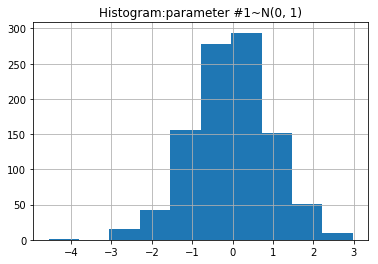

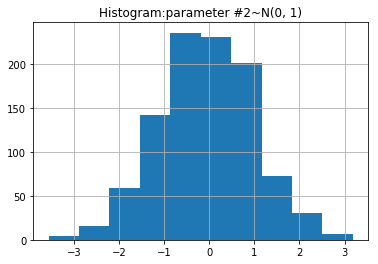

In [3]:
# Plot the distribution of the variables in the standard normal space
fig, ax = plt.subplots()
plt.title('Histogram:parameter #1~N(0, 1)')
plt.hist(x.samples[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2~N(0, 1)')
plt.hist(x.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

Correlation matrix in the standard normal space
[[ 1.   0.9]
 [ 0.9  1. ]]
Correlation matrix in the transformed space
[[ 1.          0.87906049]
 [ 0.87906049  1.        ]]


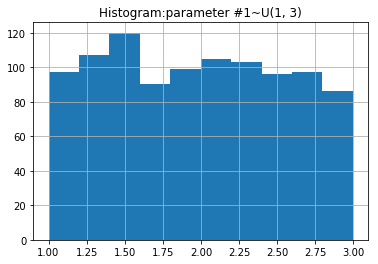

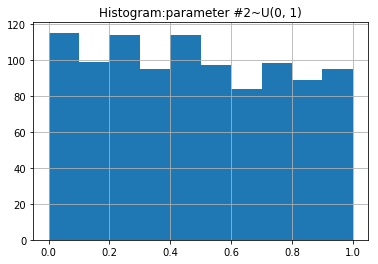

In [4]:
# Define the Gaussian correlation matrix of the random variables
Rho_G = np.array([[1.0, 0.9], [0.9, 1.0]])
print('Correlation matrix in the standard normal space')
print(Rho_G)

z = Nataf(samples=x, corr_norm=Rho_G, marginal_name=['Uniform', 'Uniform'], marginal_params=[[1, 3], [0, 1]])

print('Correlation matrix in the transformed space')
print(z.corr)


# Plot the distribution of the variables in the basic space
fig, ax = plt.subplots()
plt.title('Histogram:parameter #1~U(1, 3)')
plt.hist(z.samples_x[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2~U(0, 1)')
plt.hist(z.samples_x[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()


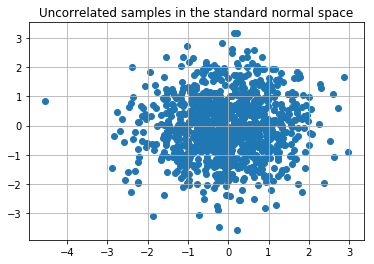

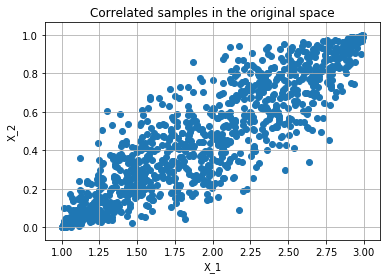

In [16]:
plt.figure()
plt.title('Uncorrelated samples in the standard normal space')
plt.scatter(z.samples[:, 0], z.samples[:, 1])
plt.grid(True)

   
plt.figure()
plt.title('Correlated samples in the original space')
plt.scatter(z.samples_x[:, 0], z.samples_x[:, 1])
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()   

Correlating standard normal samples...


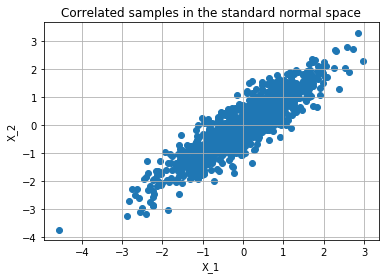

In [17]:
# Provide Nataf with already correlated samples
from UQpy.SampleMethods import Correlate
y = Correlate(x, corr_norm=Rho_G)

plt.figure()
plt.title('Correlated samples in the standard normal space')
plt.scatter(y.samples_corr[:, 0], y.samples_corr[:, 1])
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()  

In [18]:
# Use the Nataf to already correlated samples
z0 = Nataf(samples=y, marginal_name=['Uniform', 'Uniform'], marginal_params=[[1, 3], [0, 1]])

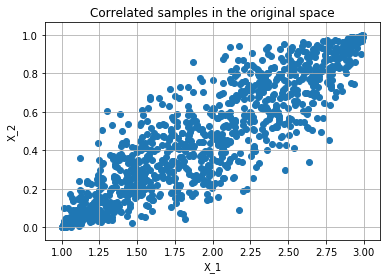

In [20]:
plt.figure()
plt.title('Correlated samples in the original space')
plt.scatter(z0.samples_x[:, 0], z0.samples_x[:, 1])
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [11]:
# Given the samples in an array
x0 = np.random.randn(1000, 2)

In [34]:
z1 = Nataf(samples=x0, corr_norm=Rho_G, marginal_name=['Lognormal', 'Gamma'], marginal_params=[[1, 2], [2, 1]])

The samples provided must be realizations of standard normal random variables.


[[  1.          15.40271699]
 [ 15.40271699   1.        ]]


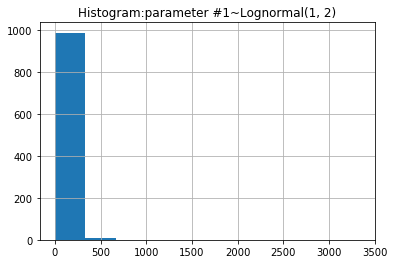

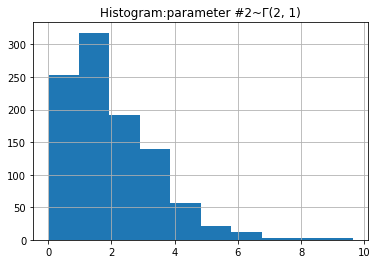

In [36]:
print(z1.corr)

# Plot the distribution of the variables in the basic space
fig, ax = plt.subplots()
plt.title('Histogram:parameter #1~Lognormal(1, 2)')
plt.hist(z1.samples_x[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2~Γ(2, 1)')
plt.hist(z1.samples_x[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()